In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from PIL.Image import open
import random
import os
import matplotlib.image as mpimg
from collections import Counter
from numba import jit, cuda

In [2]:
# Load Dataset
cortex_df=pd.read_csv('Brain Tumor.csv')
cortex_df.head()

IMAGE_DATASET='Brain Tumor'
IMAGE_DATASET_RAW='Brain Tumor'
IMG_HEIGHT=224
IMG_WIDTH=224
EPOCHS=50

C:\Users\okanc\anaconda3\lib\site-packages\numba\core\decorators.py:153: NumbaDeprecationWarning: The 'target' keyword argument is deprecated.
  warnings.warn("The 'target' keyword argument is deprecated.", NumbaDeprecationWarning)


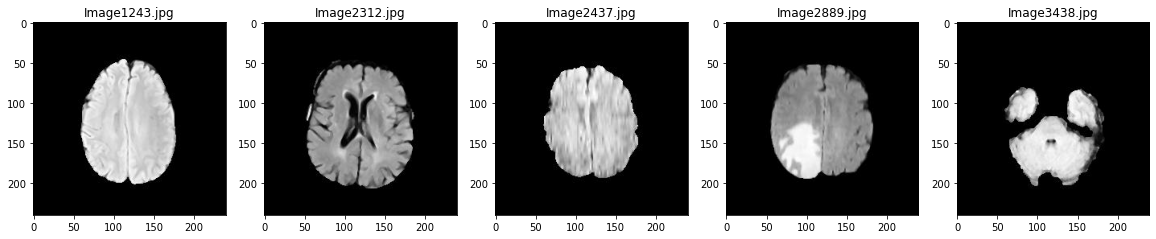

In [3]:
jit(target ="cuda")
plt.figure(figsize=(20,20))
test_folder='Brain Tumor'
for i in range(5):
    file=random.choice(os.listdir(test_folder))
    image_path=os.path.join(test_folder,file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
jit(target ="cuda")
dataset_df=pd.DataFrame()
dataset_df['Image']=cortex_df['Image']
dataset_df['Class']=cortex_df['Class']
path_list=[]
for img_path in os.listdir(IMAGE_DATASET):
    path_list.append(os.path.join(IMAGE_DATASET,img_path))
path_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
dataset_df['paths']=cortex_df['Image'].map(path_dict.get)
dataset_df['pixels']=dataset_df['paths'].map(lambda x: np.asarray(open(x).resize((IMG_HEIGHT,IMG_WIDTH))))
dataset_df.head()
                            

,Image,Class,paths,pixels
0,Image1,0,Brain Tumor\Image1.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,Brain Tumor\Image2.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,Brain Tumor\Image3.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,Brain Tumor\Image4.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,Brain Tumor\Image5.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [5]:
image_list=[]
for i in range(len(dataset_df)):
    brain_image=dataset_df['pixels'][i].astype(np.float32)
    brain_image=brain_image/255
    image_list.append(brain_image)
    
X=np.array(image_list)
print(X.shape)

(3762, 224, 224, 3)


In [6]:
y=np.array(dataset_df.Class)
y.shape

(3762,)

In [7]:
# Spliting Data ----> 20% of Data= Test         80% Data=Train
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2) 
print('X_train Shape =', X_train.shape)
print('X_test Shape =', X_test.shape)
print('y_train Shape =', y_train.shape)
print('y_test Shape =', y_test.shape)

X_train Shape = (3009, 224, 224, 3)
X_test Shape = (753, 224, 224, 3)
y_train Shape = (3009,)
y_test Shape = (753,)


In [8]:
def minkowski(data1,data2,k):
    distance=0
    for i in range(len(data1)):
        distance=distance+np.power(abs(data1[i]-data2[i]),k)
        distance=np.power(distance,(1/k))
        
    return distance  

def distance_func(data1,data2):
    distance=0
    for i in range(len(data1)):
        distance+=(data1[i]-data2[i])**2
    return np.sqrt(distance)


In [11]:

def iteration(X_test,X_train):
    distance_list=[]
    distance_label=[]
    y_hat_test=[]
    for k in range(len(X_test)):
        dist=[]
        for i in range(len(X_train)):
            distance=np.linalg.norm(X_test[k]-X_train[i])
            distance_list.append(distance)

# df_distance=pd.DataFrame(data=distance_list,index=X_train[i],columns=['Distance'])
# df_distance.head()

# distance_label=np.array(distance_label)
# print(distance_label)

# distance_list=np.array(distance_list)
    print(distance_list)

jit(target ="cuda")
iteration(X_test,X_train)

# sort_distance=np.sort(distance_list)
# print(np.sort(distance_list))

# a=zip(distance_list,distance_label)
# print(list(a))
# print(np.array(distance_label))
# print(np.array(test_label))


C:\Users\okanc\anaconda3\lib\site-packages\numba\core\decorators.py:153: NumbaDeprecationWarning: The 'target' keyword argument is deprecated.
  warnings.warn("The 'target' keyword argument is deprecated.", NumbaDeprecationWarning)
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
df_sort_distance=pd.DataFrame(data=distance_list,columns=['Distance'],index=y_train.index())
df_sort_distance.head()





# data={'Distance':distance_list,'Class':distance_label}
# deli=pd.DataFrame(data,columns=['Distance','Class'])

# df_nn = deli.sort_values(by=['Distance'], axis=0)[:5]
# df_nn.head()


AttributeError: 'numpy.ndarray' object has no attribute 'index'